In [1]:
import matplotlib.pyplot as plt
from scipy import signal
from scipy import fft
import sympy as sp
import numpy as np
import math
%run 'shared.ipynb' # holds notes + SP specific functions

In [2]:
# a.1
n = 3
Omega0 = 1000
OmegaS2 = 1500
OmegaS1 = 500
as2 = 20

## a)
ws2 = (10**(as2/10))**(1/(2*n))
display(ws2)

## b)
B = abs((Omega0**2-OmegaS2**2)/(ws2*OmegaS2))
display(B)

## c)
OM12 = np.array([-1, 1])*B/2+sp.sqrt(B**2/4+Omega0**2)
Omega1 = OM12[0]
Omega2 = OM12[1]
display(Omega1, Omega2)

## d)
ws1 = abs((Omega0**2-OmegaS1**2)/(OmegaS1*B))
as1Gain = 1/(1+ws1**(2*n))
as1 = (10*sp.log(as1Gain,10)).evalf()

display(ws1, as1Gain, as1)

2.154434690031884

386.79906946773156

825.130474659709

1211.92954412744

3.8779824420573905

0.00029392552350487145

-35.3176269961629

In [3]:
# a.2
n = 5
rippledb = 1
poles = [
    -0.0895 + 0.9901j,
    -0.2342 + 0.6119j,
    -0.2895,
    -0.2342 - 0.6119j,
    -0.0895 - 0.9901j,
]
Omega0 = 100 # cutoff frequency

## a)
HPPoles = [Omega0/pole for pole in poles]
display(HPPoles)

## b) (mm4.s17)
w01 = abs(HPPoles[0])
w02 = abs(HPPoles[1])
Q01 = -abs(HPPoles[0])/(2*HPPoles[0].real)
Q02 = -abs(HPPoles[1])/(2*HPPoles[1].real)
display(w01, w02, Q01, Q02)

## c)
display("c.")
OmegaS = 25
ws = abs(Omega0/OmegaS)
e = sp.sqrt(10**(rippledb/10)-1)
Cn = lambda w, n: sp.cosh(n*sp.acosh(w))
asdb = -10*sp.log(1+e**2*Cn(ws, n)**2,10)
display(ws, e, Cn(ws, n), asdb.evalf())

[(-9.055878982535265-100.18129363808009j),
 (-54.55757868713546-142.5439043495226j),
 -345.4231433506045,
 (-54.55757868713546+142.5439043495226j),
 (-9.055878982535265+100.18129363808009j)]

100.58976359026573

152.62795962538718

5.55383766635234

1.398778715058486

'c.'

4.0

0.508847139909588

15124.0000000000

-77.7250802033379

In [4]:
# a.3


/nix/store/h5pp34jbs854h3c5xfxxssj54as85y7r-python3.7-ipykernel-5.2.1/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log10
  # Remove the CWD from sys.path while we load stuff.


z**3 - 3*z**2 + 3*z - 1

1 - 3/z + 3/z**2 - 1/z**3

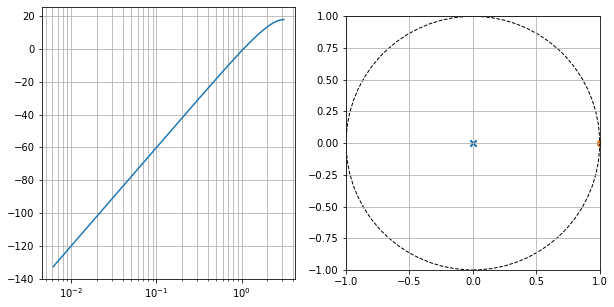

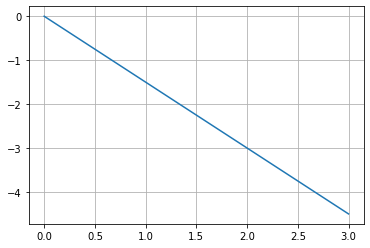

In [17]:
# b.1
poles = [0,0,0]
zeros = [1,1,1]

## 1)/2)
b, a = signal.zpk2tf(zeros, poles, 1)
fig, ax = plt.subplots(ncols=2, figsize=(10,5))
plotFilterDigital(ax[0], b, a, "")
simplezplane(ax[1], b, a, "")

## 3) determine coefficients
z = sp.symbols("z")
expZeros = (z-1)**3
expPoles = z**3
exp = expZeros/expPoles
display(expZeros.expand(), exp.expand())

## 5) draw the phase
M = 3
x = np.arange(0, sp.pi)
y = x*(-M/2)
fig, ax = plt.subplots()
ax.grid()
ax.plot(x,y)

In [22]:
# b.3
z = sp.symbols("z")
a = 0.6348
b = 0.4546

Hz = b/(1-a*z**(-1))
display(Hz.factor())

0.4546*z/(1.0*z - 0.6348)